# Evaluation Metrics: Session Overview

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

# Accuracy and Dummy Model

In [9]:
len(y_val)

1409

In [10]:
(y_val == churn_decision).sum()

1132

In [11]:
1132/1409 # accuracy

0.8034066713981547

In [12]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [13]:
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)

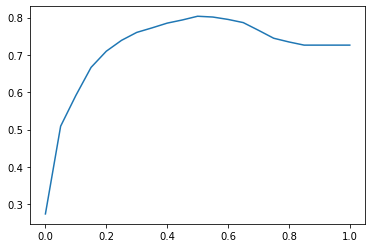

In [14]:
plt.plot(thresholds, scores)

# The highest score is around 0.5 threshold

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [17]:
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)

In [18]:
accuracy_score(y_val, y_pred >= 1)

# seems is quite good accuracy

0.7260468417317246

In [19]:
from collections import Counter

In [20]:
Counter(y_pred >= 1.0)

# Accuracy doesn't tell us how good the model performance is for this particular problem

Counter({False: 1409})

In [21]:
Counter(y_val)

# Accuracy isn't a good metric for Imbalance cases

Counter({0: 1023, 1: 386})

# Confusion Table
- Different types of errors and correct decisions
- Arranging them in a table

In [22]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [23]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [24]:
predict_positive[:5]

array([False, False, False,  True, False])

In [25]:
actual_positive[:5]

array([False, False, False,  True, False])

In [28]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [29]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [30]:
fp, fn

(101, 176)

In [39]:
confusion_matrix2 = np.array([
    [tn,fp],
    [fn,tp]
])

confusion_matrix2

array([[922, 101],
       [176, 210]])

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,y_pred >= 0.5)

array([[922, 101],
       [176, 210]], dtype=int64)

In [40]:
(confusion_matrix2/ confusion_matrix2.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

# Precision and Recall